In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_digits
from sklearn import set_config
set_config(display='diagram')

In [64]:
X, y = load_digits(return_X_y = True)
X.shape, y.shape

((1797, 64), (1797,))

In [65]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

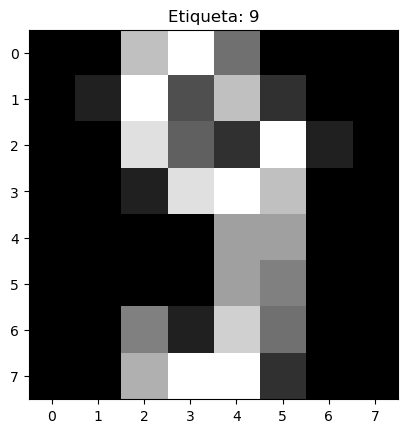

In [66]:

def print_pic(idx):
    pic = X[idx].reshape(8,8)
    plt.imshow(pic, cmap="gray")
    plt.title(f'Etiqueta: {y[idx]}')
    plt.show()

print_pic(125)

In [67]:
# Hacer un modelo que prediga que número es a través de la foto...add()


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=42)

X_train.shape, X_val.shape

((1257, 64), (540, 64))

In [68]:
%time

params = dict(
    model__activation = ["logistic", "tanh", "relu"],
    model__hidden_layer_sizes = [(100, ), (64, 32), (128, 64)],
    model__batch_size = [8, 16, 32, 64, 128],
    model__solver = ["sgd", "adam"]
)

mlp = MLPClassifier(random_state=42, max_iter = 100, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1) # 

pipe = Pipeline(steps = [
    ('sc', StandardScaler()),
    ('model', mlp)
])


search = GridSearchCV(pipe, params, cv = 5, n_jobs = -1)

CPU times: total: 0 ns
Wall time: 0 ns


In [69]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('model',
                                        MLPClassifier(early_stopping=True,
                                                      max_iter=100,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'model__activation': ['logistic', 'tanh', 'relu'],
                         'model__batch_size': [8, 16, 32, 64, 128],
                         'model__hidden_layer_sizes': [(100,), (64, 32),
                                                       (128, 64)],
                         'model__solver': ['sgd', 'adam']})

In [70]:

print(f"Best Score {search.best_score_}")
print(f"Best Params {search.best_params_}")
results = pd.DataFrame(search.cv_results_)

Best Score 0.9626067159931703
Best Params {'model__activation': 'tanh', 'model__batch_size': 16, 'model__hidden_layer_sizes': (128, 64), 'model__solver': 'adam'}


In [71]:
PARAMS = ["param_model__activation", "param_model__batch_size", "param_model__hidden_layer_sizes", "param_model__solver"]

results.sort_values(by = "rank_test_score", ascending=True).head(10)[PARAMS + ["rank_test_score"]]

,param_model__activation,param_model__batch_size,param_model__hidden_layer_sizes,param_model__solver,rank_test_score
41,tanh,16,"(128, 64)",adam,1
47,tanh,32,"(128, 64)",adam,2
35,tanh,8,"(128, 64)",adam,3
59,tanh,128,"(128, 64)",adam,4
53,tanh,64,"(128, 64)",adam,5
40,tanh,16,"(128, 64)",sgd,6
33,tanh,8,"(64, 32)",adam,7
39,tanh,16,"(64, 32)",adam,8
65,relu,8,"(128, 64)",adam,9
77,relu,32,"(128, 64)",adam,10


In [72]:
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__batch_size,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.159072,0.510095,0.001703,0.000244,logistic,8,"(100,)",sgd,"{'model__activation': 'logistic', 'model__batc...",0.928571,0.888889,0.932271,0.944223,0.920319,0.922855,0.018644,61
1,1.961053,0.394625,0.002000,0.000708,logistic,8,"(100,)",adam,"{'model__activation': 'logistic', 'model__batc...",0.948413,0.920635,0.952191,0.972112,0.944223,0.947515,0.016499,30
2,6.631440,2.123655,0.002721,0.000685,logistic,8,"(64, 32)",sgd,"{'model__activation': 'logistic', 'model__batc...",0.591270,0.865079,0.908367,0.848606,0.760956,0.794855,0.112518,81
3,3.135916,0.372208,0.002504,0.000837,logistic,8,"(64, 32)",adam,"{'model__activation': 'logistic', 'model__batc...",0.932540,0.916667,0.956175,0.972112,0.944223,0.944343,0.019060,35
4,7.927990,3.825745,0.003210,0.000243,logistic,8,"(128, 64)",sgd,"{'model__activation': 'logistic', 'model__batc...",0.904762,0.773810,0.669323,0.916335,0.780876,0.809021,0.091902,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.544722,0.066740,0.002200,0.000746,relu,128,"(100,)",adam,"{'model__activation': 'relu', 'model__batch_si...",0.940476,0.944444,0.952191,0.960159,0.940239,0.947502,0.007664,31
86,1.153882,0.220677,0.004334,0.005916,relu,128,"(64, 32)",sgd,"{'model__activation': 'relu', 'model__batch_si...",0.880952,0.892857,0.908367,0.864542,0.900398,0.889423,0.015375,75
87,0.725569,0.075929,0.001915,0.000592,relu,128,"(64, 32)",adam,"{'model__activation': 'relu', 'model__batch_si...",0.960317,0.928571,0.960159,0.964143,0.928287,0.948296,0.016284,28
88,1.332920,0.178212,0.002215,0.000404,relu,128,"(128, 64)",sgd,"{'model__activation': 'relu', 'model__batch_si...",0.892857,0.908730,0.916335,0.920319,0.900398,0.907728,0.010084,72
